# Yulu-Hypothesis-Testing

## About Yulu
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

## Problem Statement
The company wants to know:

•	Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

•	How well those variables describe the electric cycle demands




In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind, chi2_contingency, f_oneway, shapiro, kruskal, levene
from statsmodels.graphics.gofplots import qqplot

**Column Profiling(Given)**
- datetime: datetime
-  season: season (1: spring, 2: summer, 3: fall, 4: winter)
-  holiday : whether day is a holiday or not
-  workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
-  weather:
-  1: Clear, Few clouds, partly cloudy
-  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
-  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +
Scattered clouds
-  4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
-  temp: temperature in Celsius
-  atemp: feeling temperature in Celsius
-  humidity: humidity
-  windspeed: wind speed
-  casual: count of casual users
-  registered: count of registered users
-  count: count of total rental bikes including both casual and registered

In [2]:
df = pd.read_csv('./bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 12)

In [3]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [4]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
df.describe(include='object')

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [6]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There is No missing values in the dataset.

In [7]:
df["humidity"].nunique()

89

In [8]:
df["temp"].nunique()

49

In [9]:
df["atemp"].nunique()

60

In [10]:
df["windspeed"].nunique()

28

# Univariate Analysis

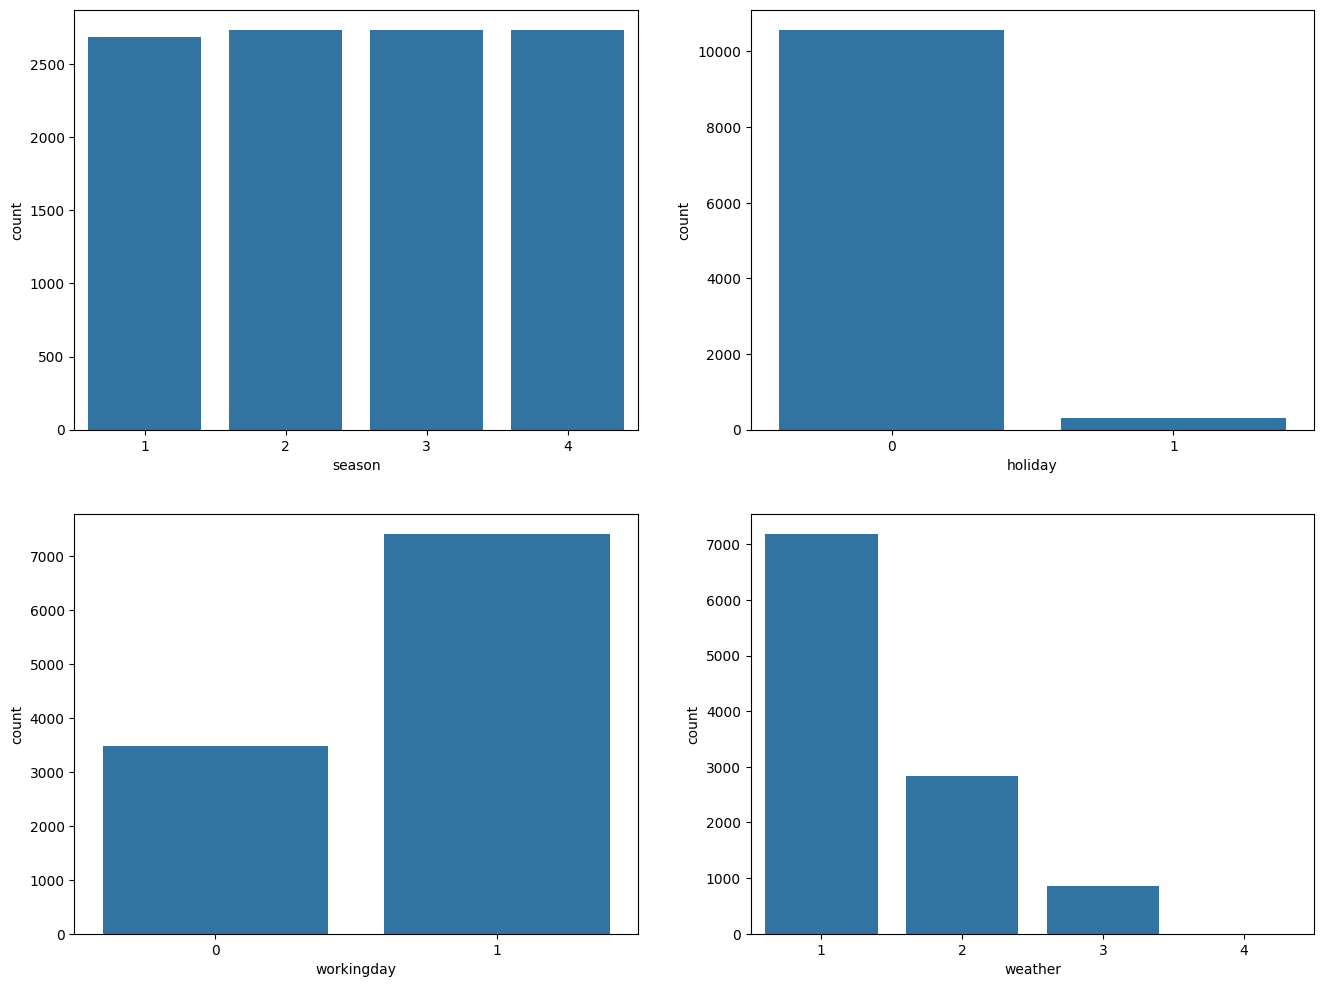

In [11]:
cat = ['season', 'holiday', 'workingday', 'weather']

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(x=df[cat[index]],data=df,ax=axis[row,col])
        index += 1

plt.show()

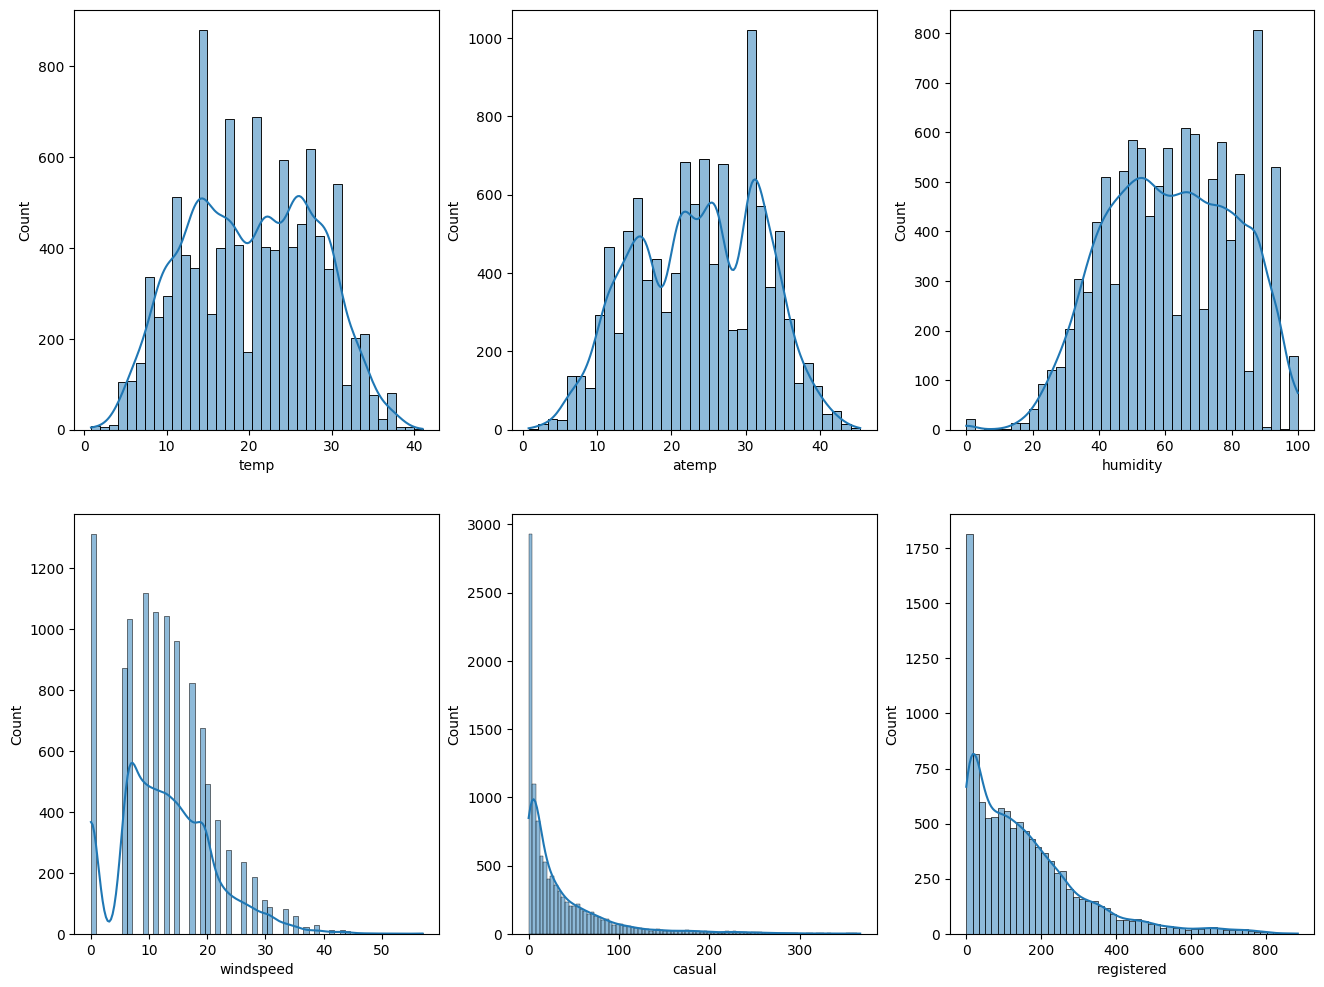

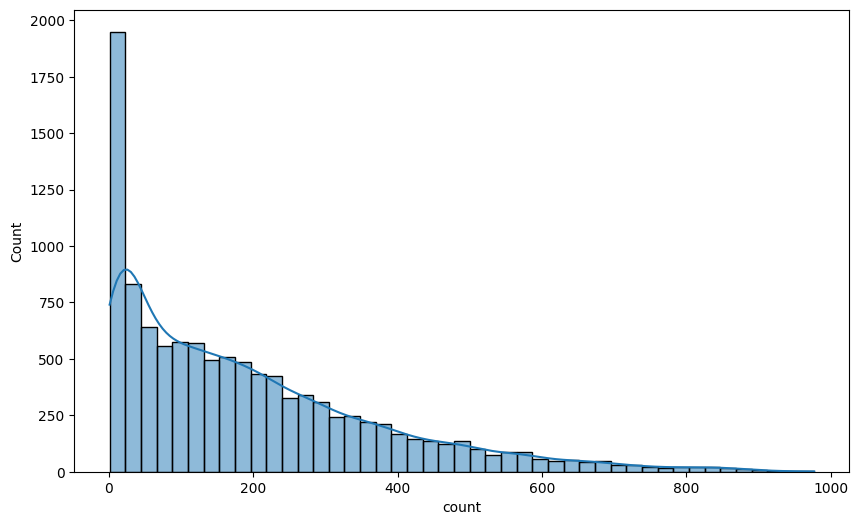

In [12]:
nums_cols = ['temp', 'atemp', 'humidity', 'windspeed','casual','registered','count'] 
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[nums_cols[index]], ax=axis[row, col], kde=True)
        index += 1

plt.show()
plt.figure(figsize=(10,6))
sns.histplot(df[nums_cols[-1]],kde=True)
plt.show()

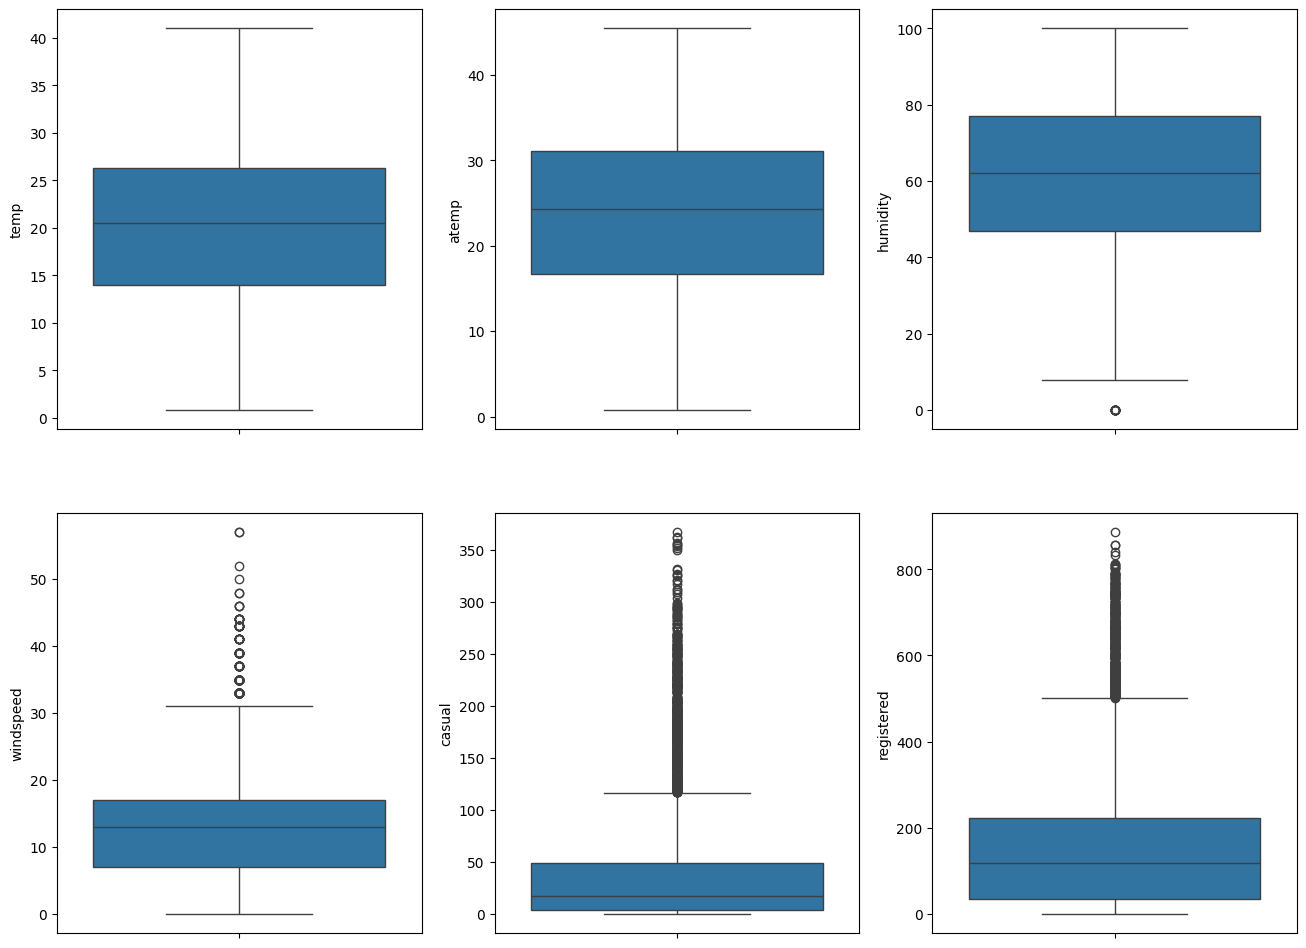

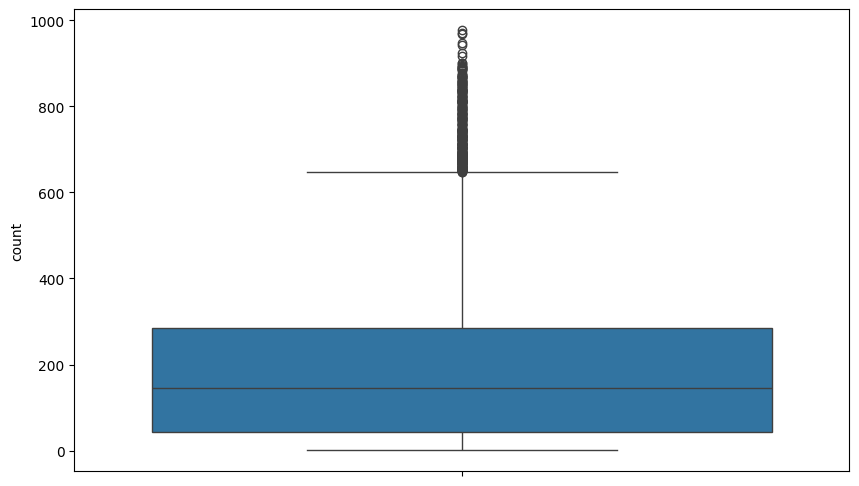

In [13]:
nums_cols = ['temp', 'atemp', 'humidity', 'windspeed','casual','registered','count'] 
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(df[nums_cols[index]], ax=axis[row, col])
        index += 1

plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(df[nums_cols[-1]])
plt.show()

#  Bivariate Analysis

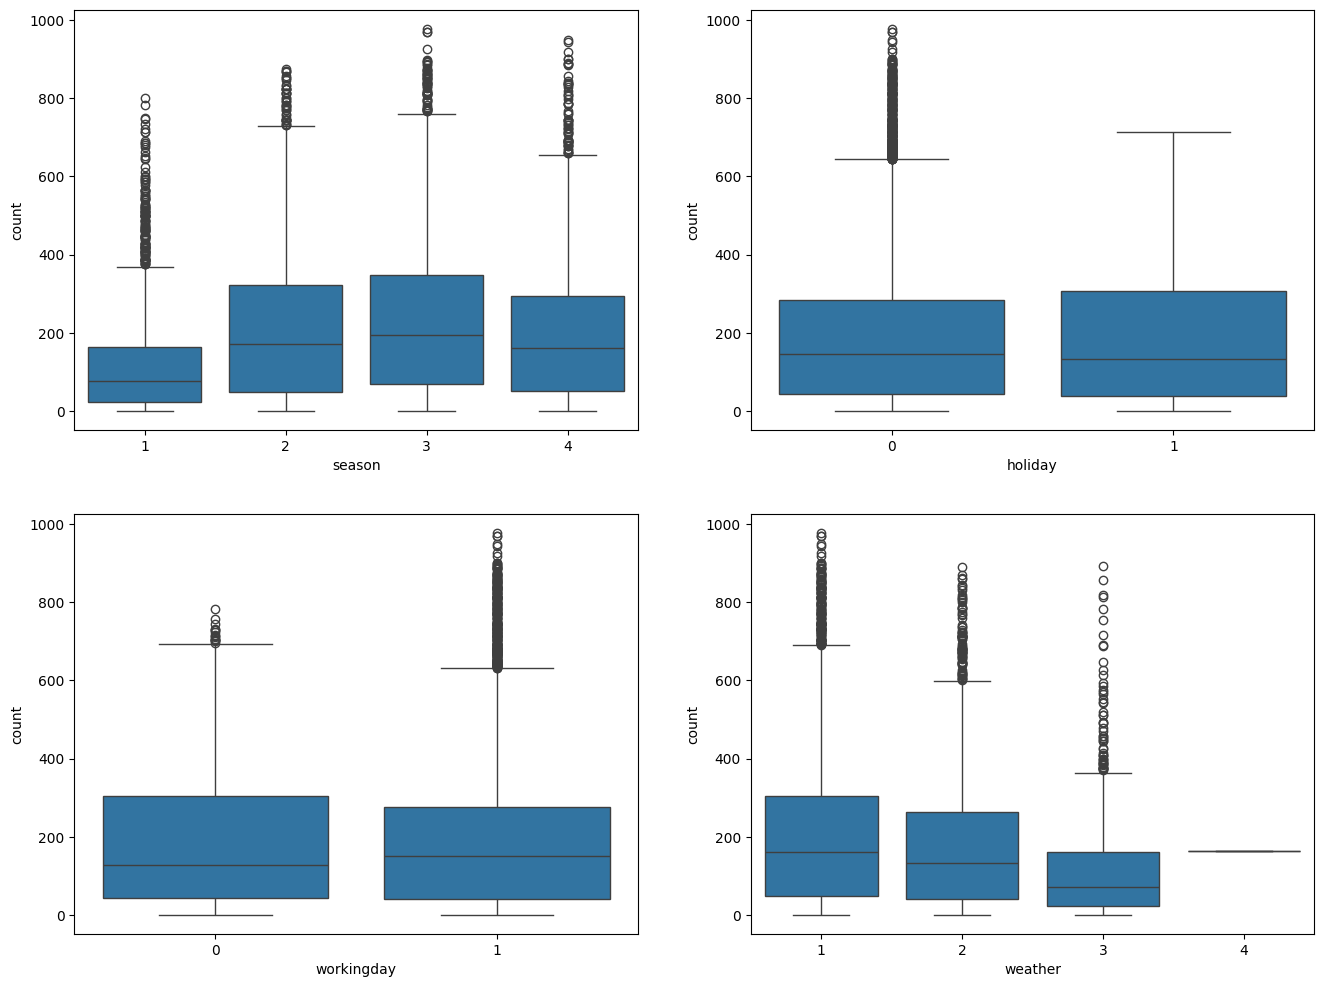

In [14]:
cat = ['season', 'holiday', 'workingday', 'weather']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(x=df[cat[index]],data=df,y='count',ax=axis[row,col])
        index += 1

plt.show()

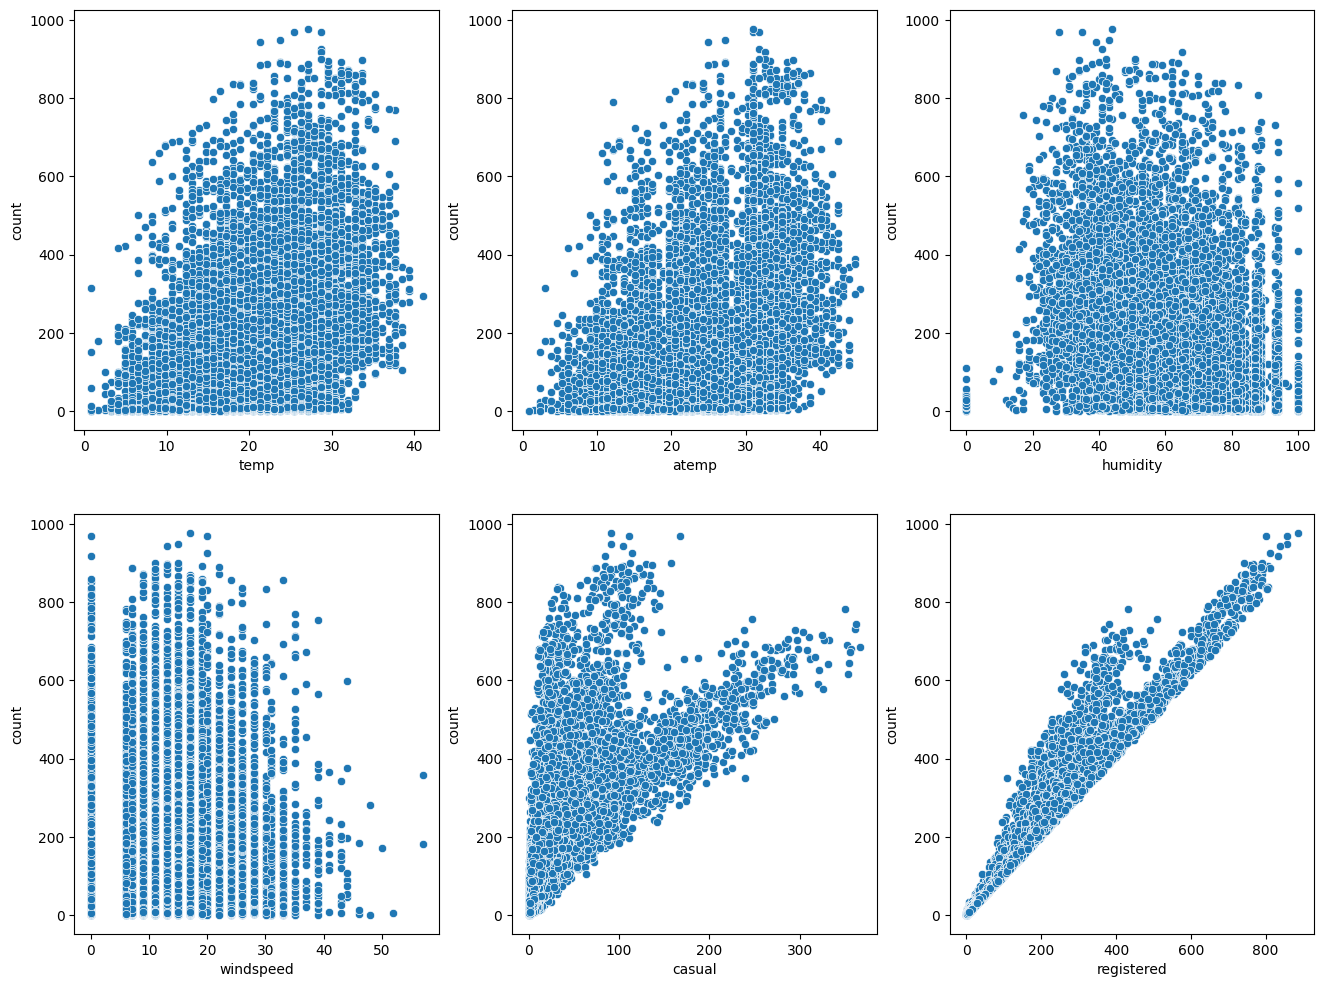

In [15]:
nums_cols = ['temp', 'atemp', 'humidity', 'windspeed','casual','registered','count'] 
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df,x = df[nums_cols[index]],y='count', ax=axis[row, col])
        index += 1

plt.show()

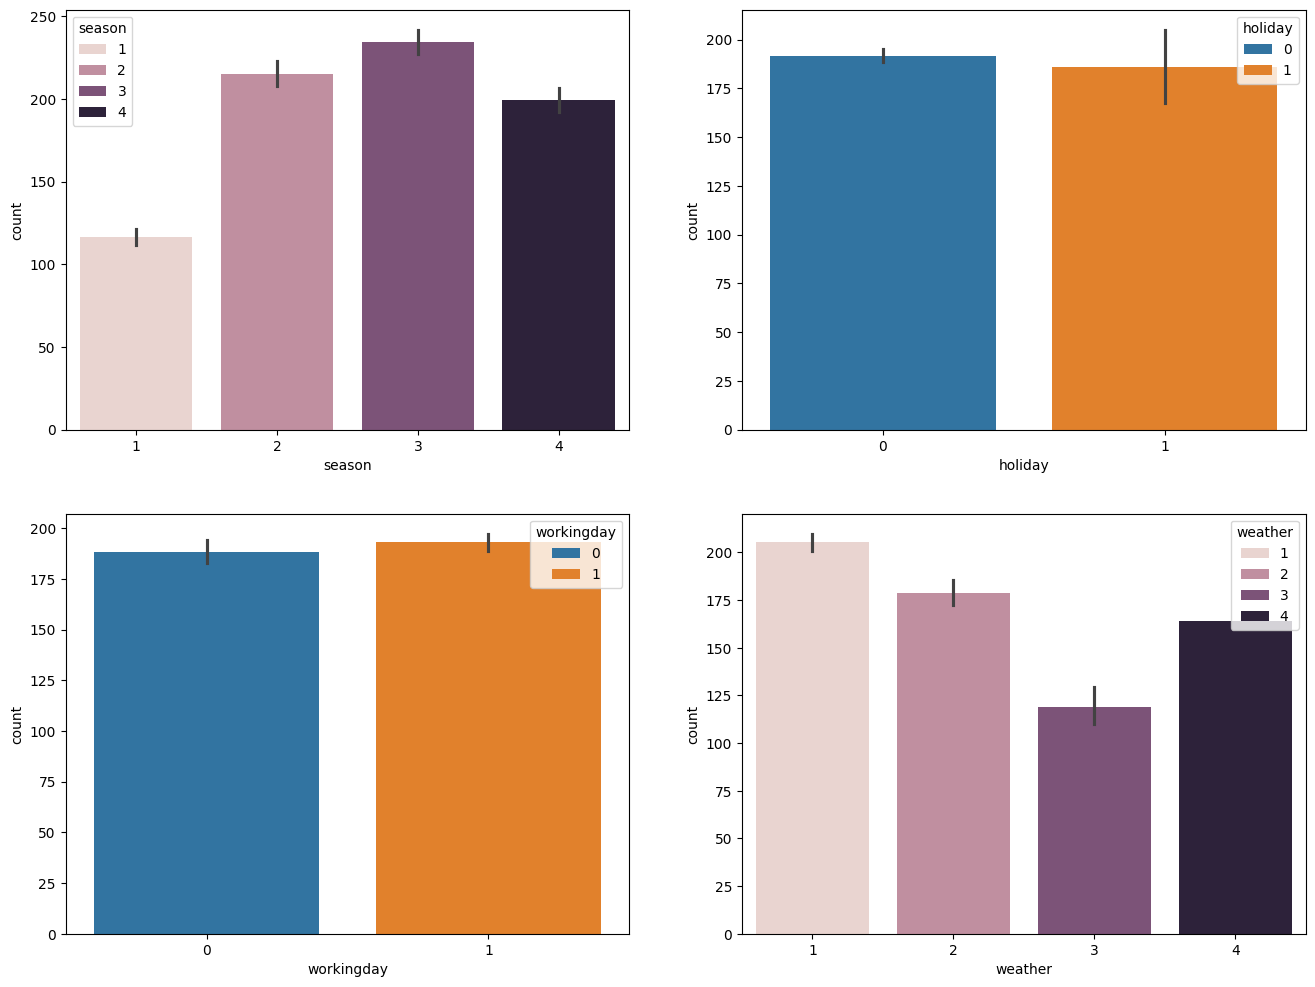

In [98]:
# Count vs Categorical
cat = ['season', 'holiday', 'workingday', 'weather']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.barplot(y='count',data=df,x=df[cat[index]],hue=df[cat[index]],ax=axis[row,col])
        index += 1

plt.show() 


**Weather**
- Clear weather has most no of demand where as heavy rain has more demand than light rain(That is strange) 
- Cloudy weather also lowest no of demand for cycles.

**Season**
- Fall has the highest demand for shared electric cycles
- Summer and winter have almost the same demand
- Spring Season has lowest no of demand 
 
**Holiday**
- Non-Holiday has the slightly more demand for shared electric cycles

**Working Day**
- Working Day has slightly more demand for shared electric cycles than weekends

# Multivariate Analysis

In [24]:
df_num = df[nums_cols]
df_num.corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


<Axes: >

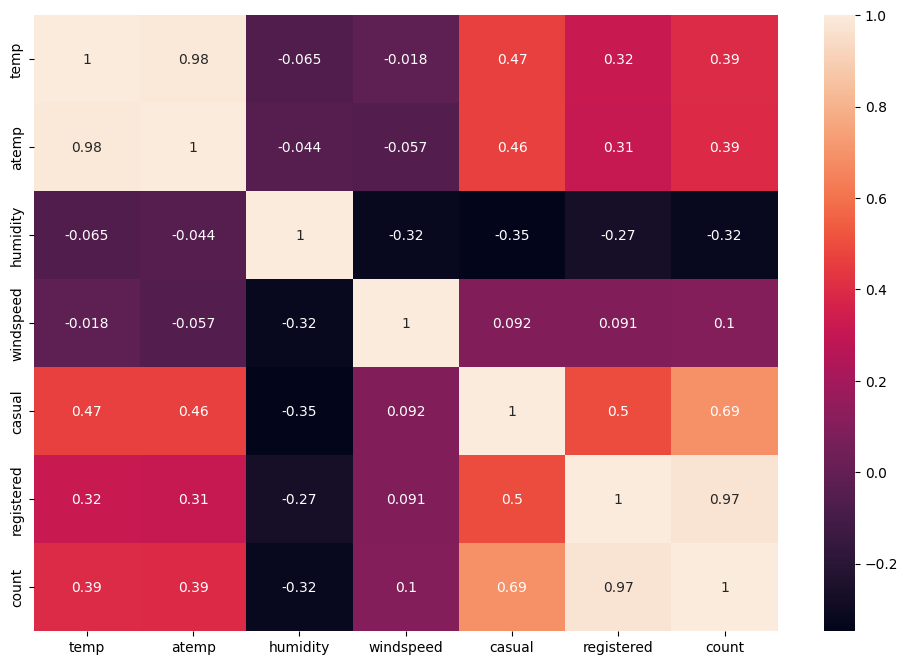

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df_num.corr(),annot=True)

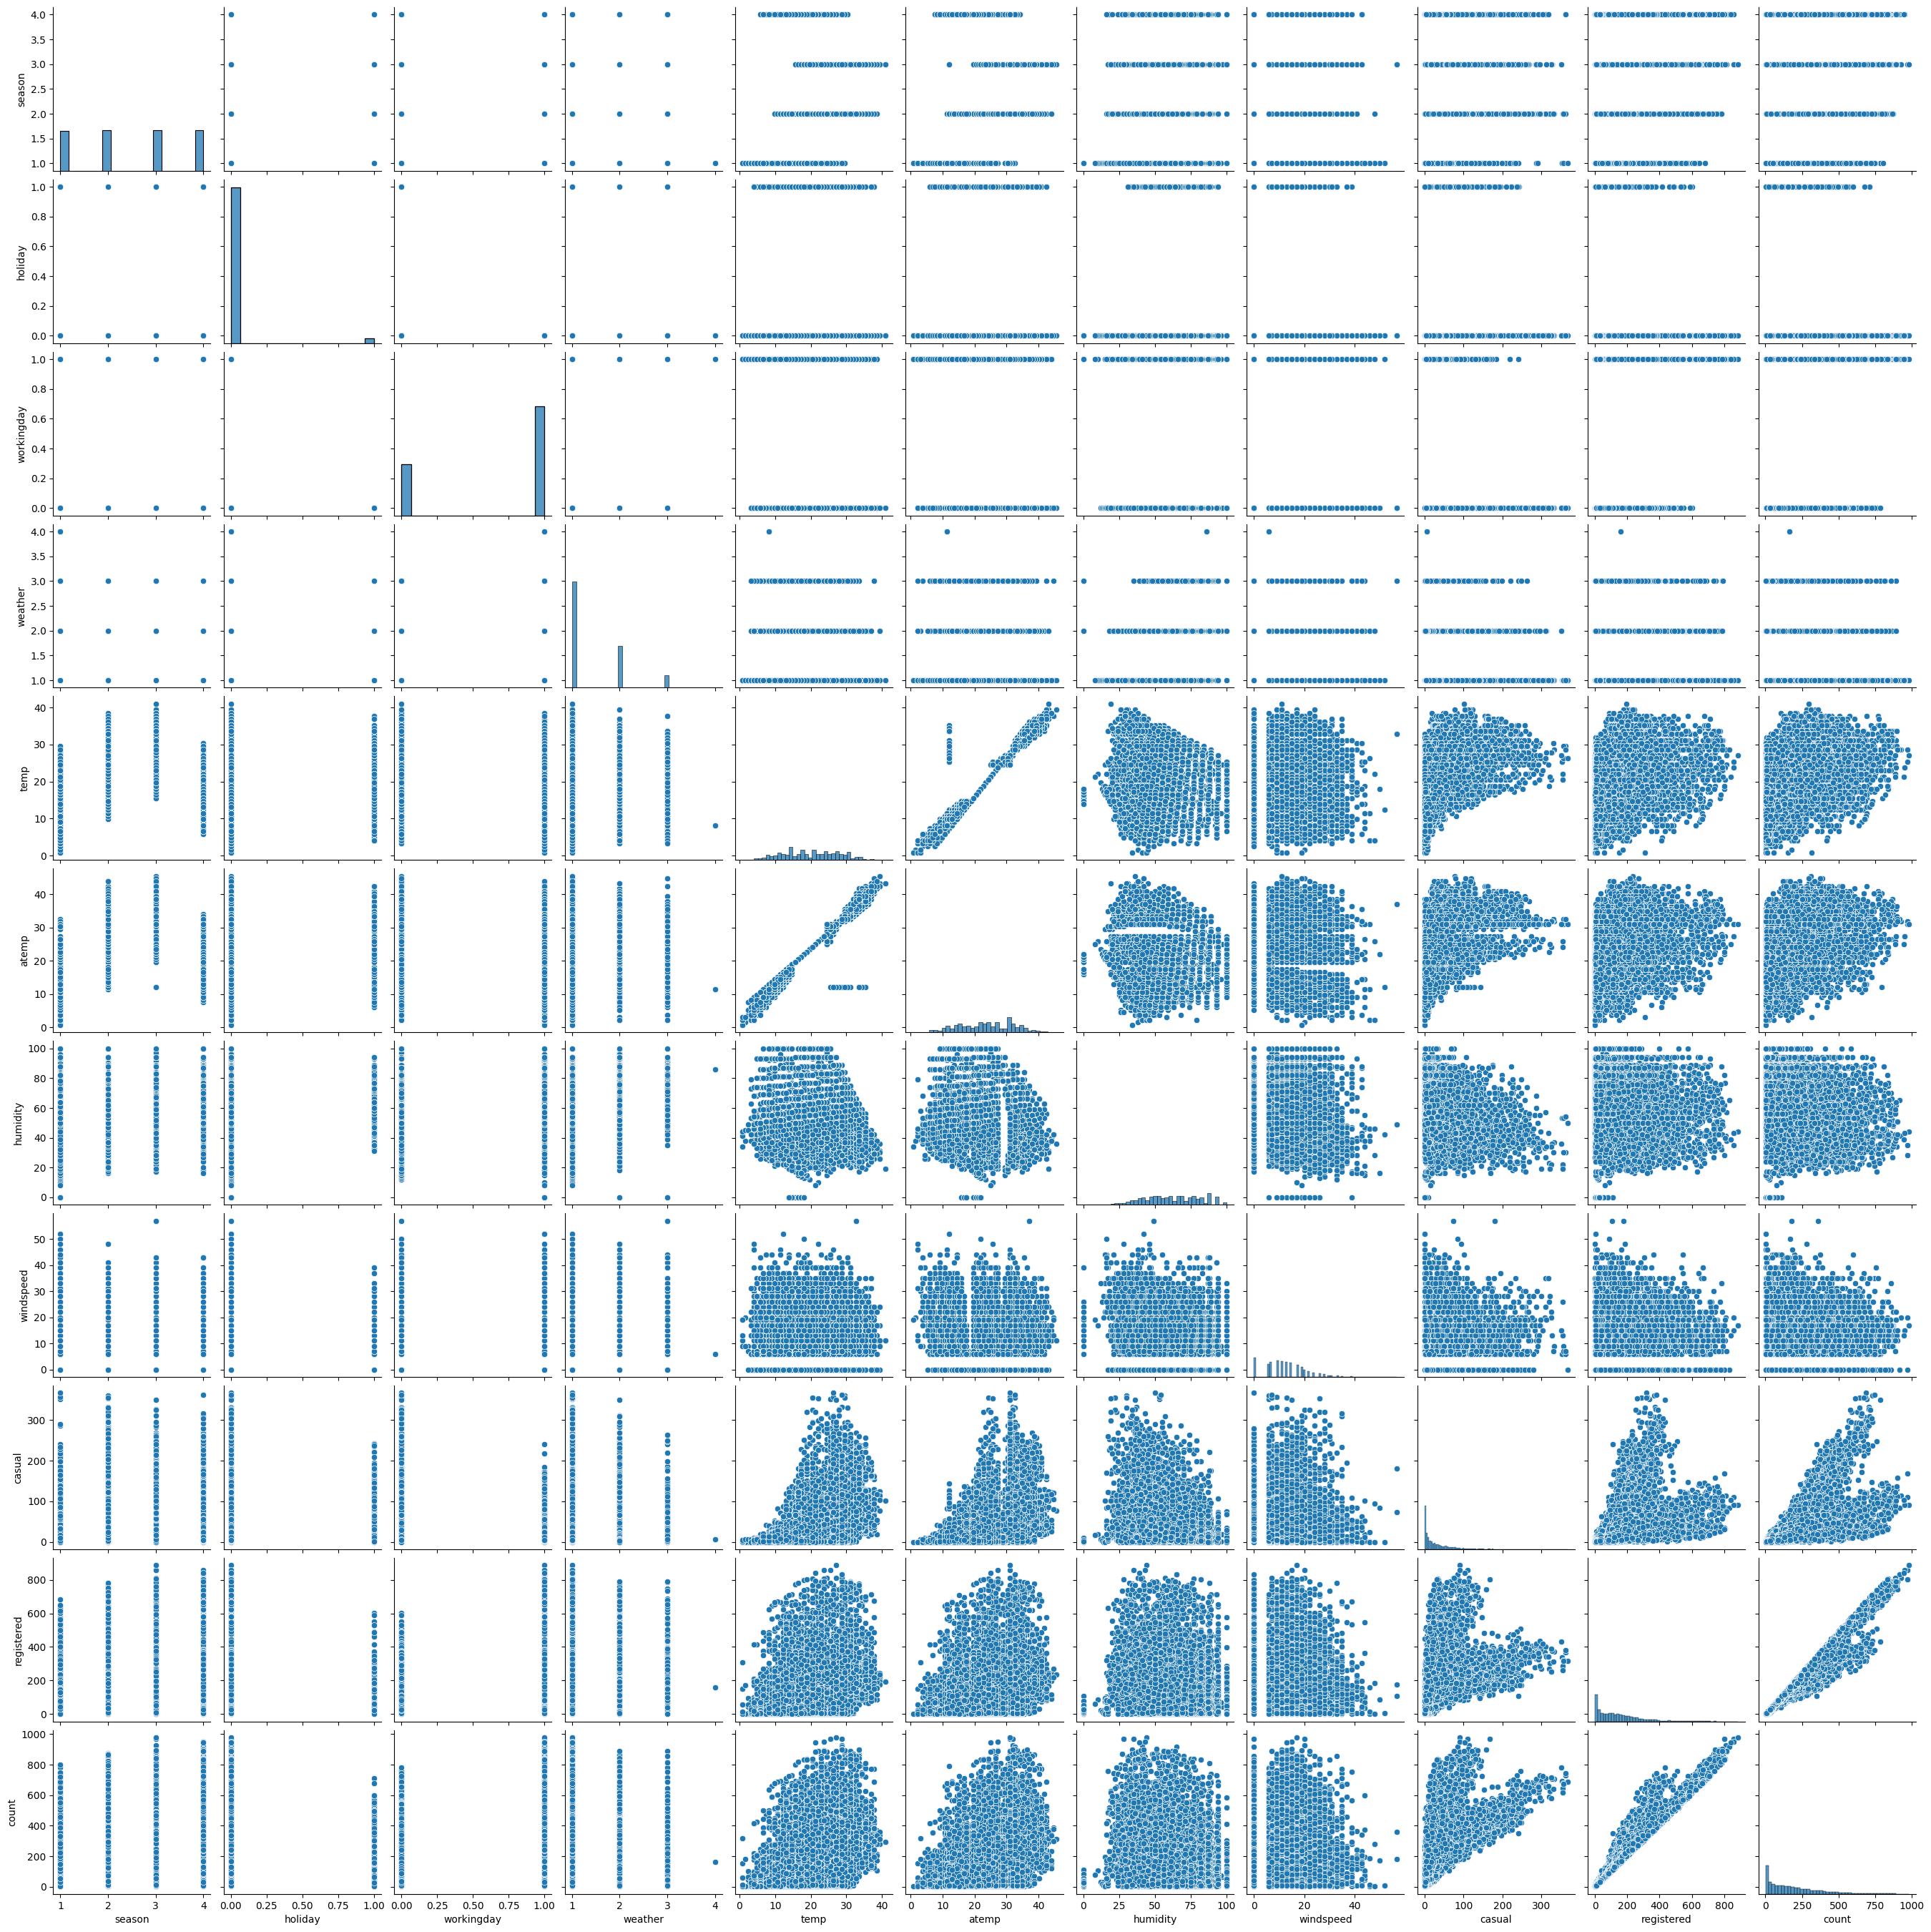

In [18]:
sns.pairplot(df)

## Hypothesis Testing 
- We are taking significance level as 0.05 for all the hypothesis testing.

### Chi-Square Test

**Weather and season are dependent or Independent**
- Null Hypothesis(H0): Weather and season are independent.
- Alternate Hypothesis(Ha): Weather and season are dependent.

In [29]:
weather = df["weather"]
season = df["season"]
val = pd.crosstab(weather, season)
val

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [30]:
# calculate chi2_contingency
chi2, p, dof, ex = chi2_contingency(val)
print(f"Chi2: {chi2}, p-value: {p}, dof: {dof}")

if p < 0.05:
    print("Reject H0: Weather and Season are dependent")
else:
    print("Fail to Reject H0: Weather and Season are independent")

Chi2: 49.15865559689363, p-value: 1.5499250736864862e-07, dof: 9
Reject H0: Weather and Season are dependent


### T-Test

**Working Day and Count are dependent or Independent**
- Null Hypothesis(H0): Working Day and Count are independent.
- Alternate Hypothesis(Ha): Working Day and Count are dependent.

In [34]:
working_day = df[df["workingday"] ==1]['count']
nonWorking_day = df[df["workingday"] == 0]['count']

In [35]:
stats, p_value = ttest_ind(working_day, nonWorking_day)
print(f"p-value: {p_value}")
print(f"stats: {stats}")

if p_value < 0.05:
  print("Reject H0: Working Day and count are Dependent")
else:
  print("Reject Ha: Working Day and count are Independent")

p-value: 0.22644804226361348
stats: 1.2096277376026694
Reject Ha: Working Day and count are Independent


### Anova Test 

No. of cycles rented similar or different in different seasons
- Null Hypothesis(H0): No. of cycles rented similar in different seasons.
- Alternate Hypothesis(Ha): No. of cycles rented different in different seasons.

In [41]:
spring = df[df["season"] == 1]['count']  
summer = df[df["season"] == 2]['count']
fall = df[df["season"] == 3]['count']
winter = df[df["season"] == 4]['count']

df.groupby('season')['count'].mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

To check the above hypothesis, we will perform the following steps:
- Check normality of the data
- Check variance of the data

**Checking Normality**

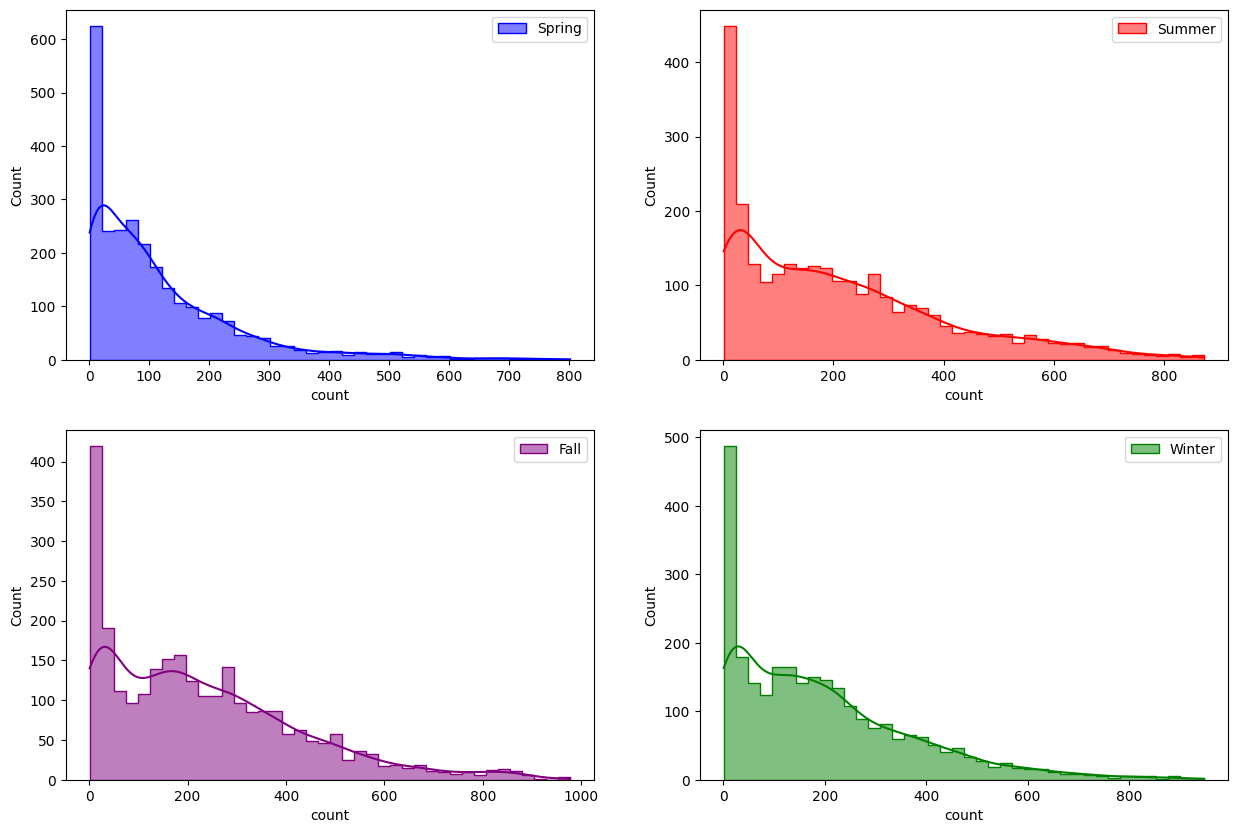

In [80]:

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(spring, bins=40, element='step', color='blue', kde=True, label='Spring')
plt.legend()

plt.subplot(2, 2, 2)
sns.histplot(summer, bins=40, element='step', color='red', kde=True, label='Summer')
plt.legend()

plt.subplot(2, 2, 3)
sns.histplot(fall, bins=40, element='step', color='purple', kde=True, label='Fall')
plt.legend()

plt.subplot(2, 2, 4)
sns.histplot(winter, bins=40, element='step', color='green', kde=True, label='Winter')
plt.legend()

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

**QQ plot to check normality**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


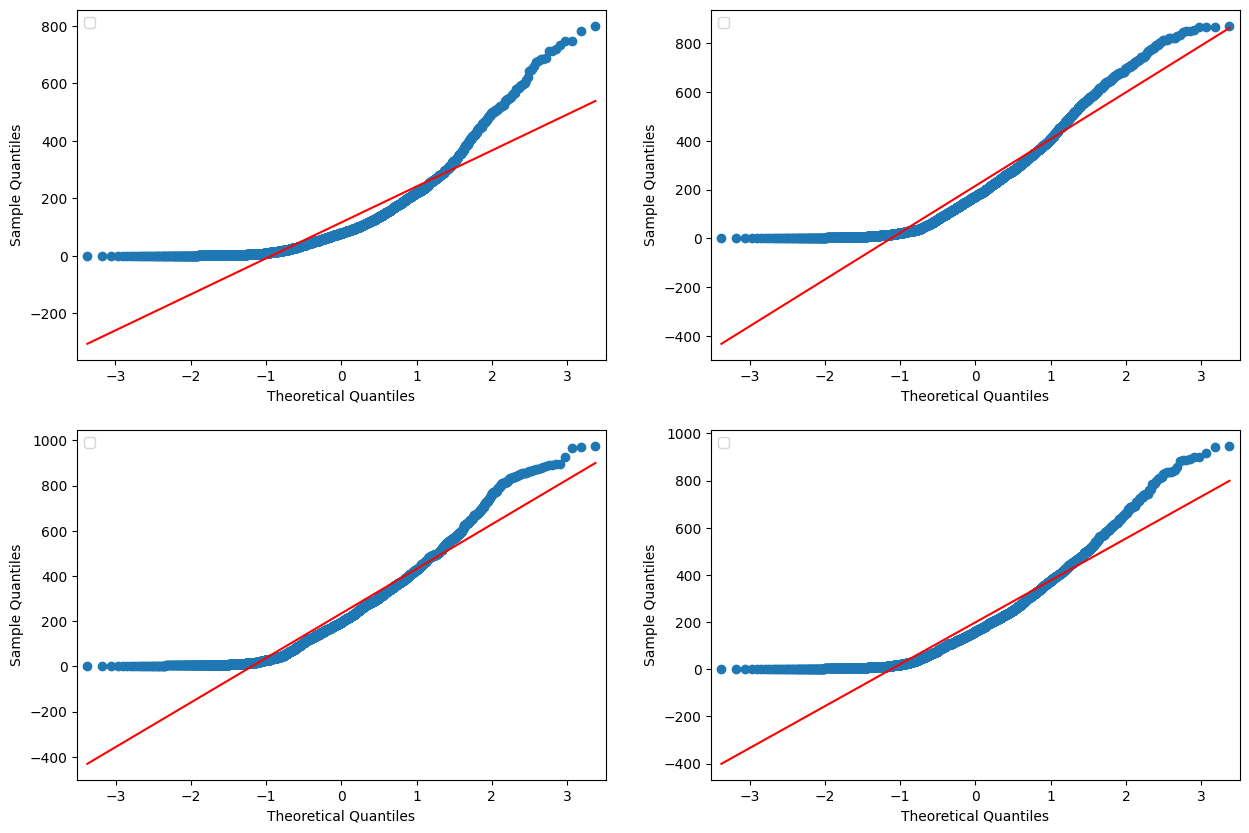

In [52]:

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
qqplot(spring, line='s', ax=plt.gca())
plt.legend()

plt.subplot(2, 2, 2)
qqplot(summer, line='s', ax=plt.gca())
plt.legend()

plt.subplot(2, 2, 3)
qqplot(fall, line='s', ax=plt.gca())
plt.legend()

plt.subplot(2, 2, 4)
qqplot(winter, line='s', ax=plt.gca())
plt.legend()

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

The Data is donot normally distributed.

**Shapiro Test**
- Spairo wilk test is used to confirm the normality of the data.

### H0: Data is Gaussian
### Ha: Data is not Gaussian

In [69]:
def checkNormality(data,name):
  print("Normality Test for:", name, "->")
  test_stat, p_value = shapiro(data)
  print("Stats: ", test_stat)
  print("P-value: ", p_value)



  if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
  else:
    print("Fail to reject H0")
    print("Data is Gaussian")

In [83]:
season = [spring, summer, fall, winter]
name = ['Spring', 'Summer', 'Fall', 'Winter']
for i in range(4):
  checkNormality(season[i].iloc[:100], name[i])

Normality Test for: Spring ->
Stats:  0.8698215484619141
P-value:  6.89496957306801e-08
Reject H0
Data is not Gaussian
Normality Test for: Summer ->
Stats:  0.8869026303291321
P-value:  3.598051705466787e-07
Reject H0
Data is not Gaussian
Normality Test for: Fall ->
Stats:  0.9146706461906433
P-value:  7.421303507726407e-06
Reject H0
Data is not Gaussian
Normality Test for: Winter ->
Stats:  0.8757838010787964
P-value:  1.2084964851055702e-07
Reject H0
Data is not Gaussian


Data is not normally distributed. So, we have to use Kruksal Wallis Test.

### **Kruskal Wallis Test**

In [87]:
stats, p_value = kruskal(spring, summer, fall, winter)
print("P-value: ", p_value)
print("Stats: ", stats)

if p_value < 0.05:
  print("Reject H0")
  print("No. of cycles rented different in different seasons.")
else:
  print("Fail to reject H0")
  print("No. of cycles rented similar in different seasons.")

P-value:  2.479008372608633e-151
Stats:  699.6668548181988
Reject H0
No. of cycles rented different in different seasons.


### Hypothesis Testing-4 : No. of cycles rented similar or different in different weather

No. of cycles rented similar or different in different seasons
- Null Hypothesis(H0): No. of cycles rented similar in different weather.
- Alternate Hypothesis(Ha): No. of cycles rented different in different weather.

In [63]:
clear = df[df["season"] == 1]['count']  
mist = df[df["season"] == 2]['count']
light_rain = df[df["season"] == 3]['count']
heavy_rain = df[df["season"] == 4]['count']

df.groupby('weather')['count'].mean()

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

**Check Normality**

QQ plot

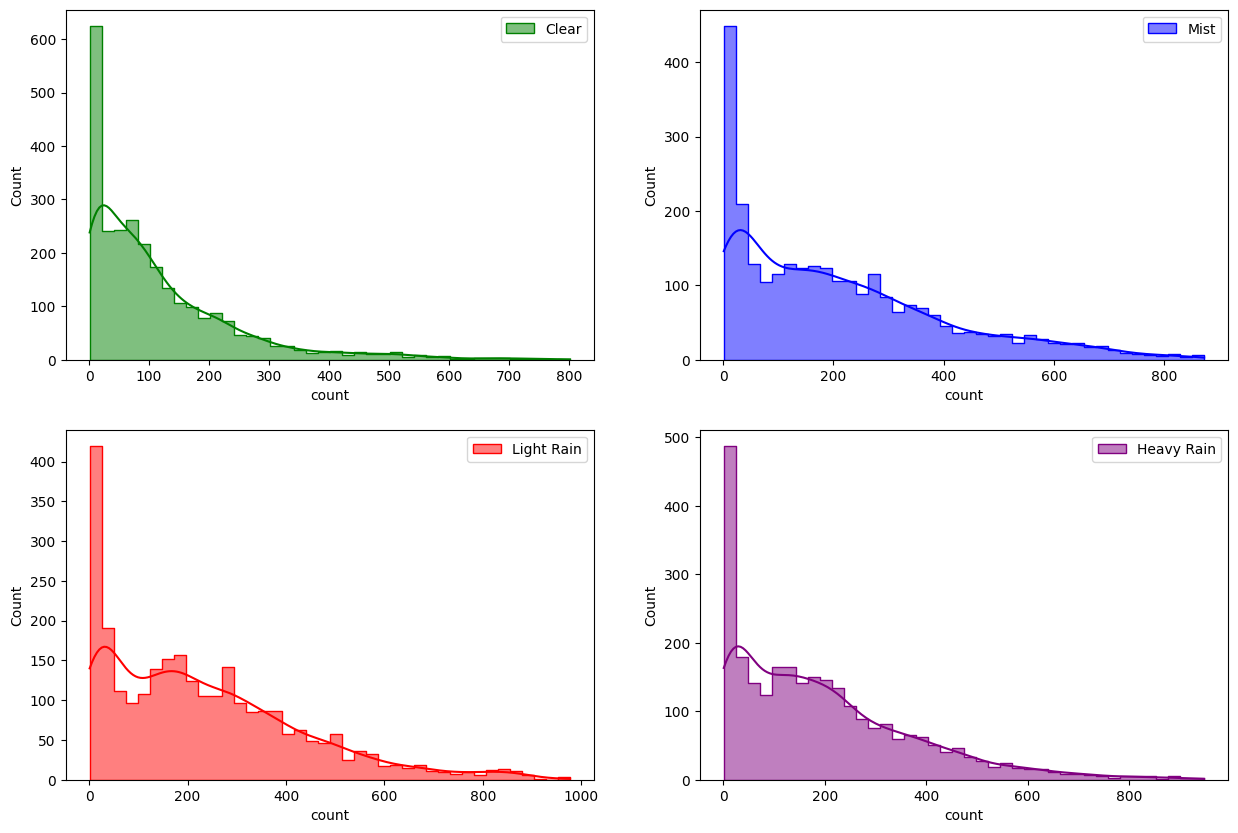

In [82]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(clear, bins=40, element='step', color='green', kde=True, label='Clear')
plt.legend()

plt.subplot(2, 2, 2)
sns.histplot(mist, bins=40, element='step', color='blue', kde=True, label='Mist')
plt.legend()

plt.subplot(2, 2, 3)
sns.histplot(light_rain, bins=40, element='step', color='red', kde=True, label='Light Rain')
plt.legend()

plt.subplot(2, 2, 4)
sns.histplot(heavy_rain, bins=40, element='step', color='purple', kde=True, label='Heavy Rain')
plt.legend()

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

**Shapiro Test**
- Spairo wilk test is used to confirm the normality of the data.

### H0: Data is Gaussian
### Ha: Data is not Gaussian

In [84]:
weathers = [clear, mist, light_rain, heavy_rain]
name = ['Clear', 'Mist', 'Light Rain', 'Heavy Rain']
for i in range(4):
  checkNormality(weathers[i].iloc[:100], name[i])

Normality Test for: Clear ->
Stats:  0.8698215484619141
P-value:  6.89496957306801e-08
Reject H0
Data is not Gaussian
Normality Test for: Mist ->
Stats:  0.8869026303291321
P-value:  3.598051705466787e-07
Reject H0
Data is not Gaussian
Normality Test for: Light Rain ->
Stats:  0.9146706461906433
P-value:  7.421303507726407e-06
Reject H0
Data is not Gaussian
Normality Test for: Heavy Rain ->
Stats:  0.8757838010787964
P-value:  1.2084964851055702e-07
Reject H0
Data is not Gaussian


**Chekcing variance**

In [85]:
# H0: Variance are equal
# Ha: Variance are not equal

levene_stat, p_value = levene(clear,mist,light_rain,heavy_rain)
print("Stats: ", levene_stat)
print("P-value: ", p_value)

if p_value < 0.05:
  print("Reject H0")
  print("Variance are not equal")
else:
  print("Fail to reject H0")
  print("Variance are equal")


Stats:  187.7706624026276
P-value:  1.0147116860043298e-118
Reject H0
Variance are not equal


We will use Kruskal Wallis Test as the data is not normally distributed. 

In [86]:
stats, p_value = kruskal(clear, mist, light_rain, heavy_rain)
print("P-value: ", p_value)
print("Stats: ", stats)

if p_value < 0.05:
  print("Reject H0")
  print("No. of cycles rented different in different weathers.")
else:
  print("Fail to reject H0")
  print("No. of cycles rented similar in different weathers.")

P-value:  2.479008372608633e-151
Stats:  699.6668548181988
Reject H0
No. of cycles rented similar in different weathers.


# Insights

- In summer and fall seasons more bikes are rented as compared to other seasons.
- Whenever its a holiday more bikes are rented.
- It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
- Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.
- Whenever the humidity is less than 20, number of bikes rented is very very low.
- Whenever the temperature is less than 10, number of bikes rented is less.
- Whenever the windspeed is greater than 35, number of bikes rented is less.

# Recommendation

- In **summer** and **fall** seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
- With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
- In very low humid days, company should have less bikes in the stock to be rented.
- Whenever temprature is less than 10 or in very cold days, company should have less bikes.
- Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.